In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# Exercícios:

<br>

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

<br>

2 - Quais as dimensões do dataframe?

<br>

3 - Qual o tipo das variáveis?

<br>

4 - Existem variáveis faltantes no dataset? Quais?

<br>


5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

<br>

6 - Faça um tratamento nas variáveis faltantes.

<br>

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

<br>

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

<br>

9 - Detecte e elimine os outliers da variável 'idade'.

<br>


10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

# Exercícios

### 1. Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

In [4]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


### 2 - Quais as dimensões do dataframe?

In [5]:
"Nosso data frame tem 29170 linhas e 9 colunas."

#print(df.info())
df.shape

(29170, 9)

###  3. Qual o tipo das variáveis?

In [6]:
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

### 4 - Existem variáveis faltantes no dataset? Quais?

In [7]:
""" Inicialmente temos duas colunas que não possui nenhuma informação, sem utilidade para nossa análise (nome e dívida).
    Coluna idade falte 99 registros e os demais dados estão completos"""
print(df.isnull().sum())

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64


### 5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

In [8]:
"""
    Estado civil e cor tudo ok. Mas na variavel sexo temos 1937 com '?'.Isto é um problema, que não foi identificado nos
    dados faltantes, pois possui valor. 
"""

print(df.estado_civil.value_counts())
print("\n")
print(df.cor.value_counts())
print("\n")
print(df.sexo.value_counts())
print(df.estado_civil.isnull())


Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64


White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64


Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
29165    False
29166    False
29167    False
29168    False
29169    False
Name: estado_civil, Length: 29170, dtype: bool


### 6 - Faça um tratamento nas variáveis faltantes.

In [9]:
# dados faltantes em percentual
#em percentual
# lembrando que temos a quesão do sexo a resolver ainda

print(((df.isnull().sum() / df.shape[0]) * 100).round(2))
print("\n")

print("coluna idade está consistente, com dados razoáveis. Vamos aplicar a média nos dados faltantes \n")
print(df.idade.describe())

media_idade = df.idade.mean()

df.idade = df.idade.fillna(media_idade)

df = df.dropna(axis = 1)

idade                 0.34
tempo_educacao        0.00
estado_civil          0.00
cor                   0.00
sexo                  0.00
horas_por_semana      0.00
salario_anual         0.00
nome                100.00
dívida              100.00
dtype: float64


coluna idade está consistente, com dados razoáveis. Vamos aplicar a média nos dados faltantes 

count    29071.000000
mean        38.654088
std         13.720345
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: idade, dtype: float64


In [10]:
## nosso dataframe ficou assim
## só falta tratar a questão do sexo
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K
29167,58.0,9,Widowed,White,Female,40,<=50K
29168,22.0,9,Never-married,White,Male,20,<=50K


In [11]:
#calculando a moda da variável sexo

moda_variavel_sexo = df.sexo.value_counts().idxmax()
print('moda || >> ', moda_variavel_sexo )
print("\n")

print('1937 registros com "?" confirmando nossa análise acima \n', df.loc[df['sexo'] == ('?')].count())

#df.sexo = df.sexo.fillna(moda_variavel_sexo)

moda || >>  Male


1937 registros com "?" confirmando nossa análise acima 
 idade               1937
tempo_educacao      1937
estado_civil        1937
cor                 1937
sexo                1937
horas_por_semana    1937
salario_anual       1937
dtype: int64


In [12]:
moda_variavel_sexo

'Male'

In [13]:
# tratando a variavel sexo
df.sexo.loc[df.sexo == '?'] = moda_variavel_sexo

In [14]:
df.sexo.value_counts()

Male      20118
Female     9052
Name: sexo, dtype: int64

### 7 - Aplique uma transformação "MinMax" na variável 'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

In [15]:
mm_scaler = MinMaxScaler()
X = df.tempo_educacao.values.reshape(-1,1)
X

array([[13],
       [13],
       [ 9],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [16]:
mm_scaler.fit(X)
mm_scaler.transform(X)

array([[0.8       ],
       [0.8       ],
       [0.53333333],
       ...,
       [0.53333333],
       [0.53333333],
       [0.53333333]])

In [17]:
ss_scaler = StandardScaler()
X2 = df.horas_por_semana.values.reshape(-1,1)
X2

array([[40],
       [13],
       [40],
       ...,
       [40],
       [20],
       [40]], dtype=int64)

In [18]:
ss_scaler.fit(X)

StandardScaler()

In [19]:
ss_scaler.transform(X)

array([[ 1.18189294],
       [ 1.18189294],
       [-0.48830542],
       ...,
       [-0.48830542],
       [-0.48830542],
       [-0.48830542]])

### 8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

In [20]:
## aplicando na coluna estado_civil
ohe = OneHotEncoder()
variavel_ohe = df.estado_civil.values.reshape(-1,1)
ohe.fit(variavel_ohe)
ohe.transform(variavel_ohe)
ohe.transform(variavel_ohe).toarray()
dataframe_OHE_estado_civil = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                             columns = ohe.categories_[0].tolist())
pd.concat([df, dataframe_OHE_estado_civil], axis = 1)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
## aplicando na coluna cor
ohe = OneHotEncoder()
variavel_ohe = df.cor.values.reshape(-1,1)
ohe.fit(variavel_ohe)
ohe.transform(variavel_ohe)
ohe.transform(variavel_ohe).toarray()
dataframe_OHE = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                             columns = ohe.categories_[0].tolist())
pd.concat([df, dataframe_OHE], axis = 1)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,0.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,0.0,0.0,1.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,0.0,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,0.0,1.0


In [22]:
## aplicando na coluna cor
ohe = OneHotEncoder()
variavel_ohe = df.cor.values.reshape(-1,1)
ohe.fit(variavel_ohe)
ohe.transform(variavel_ohe)
ohe.transform(variavel_ohe).toarray()
dataframe_OHE_cor = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                             columns = ohe.categories_[0].tolist())
pd.concat([df, dataframe_OHE_cor], axis = 1)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,0.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,0.0,0.0,1.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,0.0,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,0.0,1.0


In [23]:
## aplicando na coluna sexo
ohe = OneHotEncoder()
variavel_ohe = df.sexo.values.reshape(-1,1)
ohe.fit(variavel_ohe)
ohe.transform(variavel_ohe)
ohe.transform(variavel_ohe).toarray()
print(ohe.categories_)
dataframe_OHE_sexo = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                             columns = ohe.categories_[0].tolist())
pd.concat([df, dataframe_OHE_sexo], axis = 1)

[array(['Female', 'Male'], dtype=object)]


,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Female,Male
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,1.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,1.0,0.0
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,1.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,1.0,0.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,1.0


### 9 - Detecte e elimine os outliers da variável 'idade'.

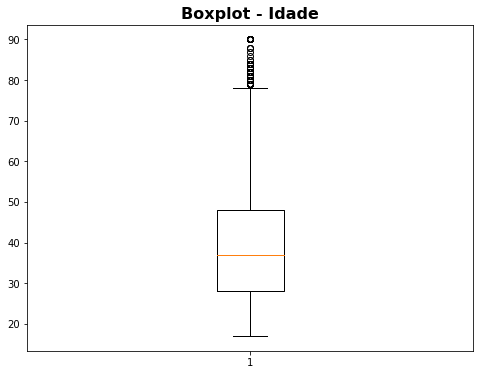

In [24]:
plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df.idade)
plt.show()

In [25]:
#primeiramente, calculamos o intervalo interquartil
iqr = np.percentile(df.idade, 75) - np.percentile(df.idade, 25)
iqr

20.0

In [26]:
limite_inf = np.maximum(np.percentile(df.idade, 25) - 1.5 * iqr, np.min(df.idade))
limite_inf

17.0

In [27]:
limite_sup = np.minimum(np.percentile(df.idade, 75) + 1.5 * iqr, np.max(df.idade))
limite_sup

78.0

In [28]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [29]:
df['outlier_idade'] = detecta_outlier(df.idade)

In [30]:
df = df.loc[df.outlier_idade == 0]

In [31]:
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


### 10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [32]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")

In [33]:
def processaDados(df):
    df_limpo = df.copy()
    
    # tratamento dados faltantes idade (aplicando a media)
    media_idade = df_limpo.idade.mean()
    df_limpo.idade = df_limpo.idade.fillna(media_idade)
    df_limpo = df_limpo.dropna(axis = 1)
    
    ## func detecta outlier idade
    def detecta_outlier(x, limite = 1.5):
        iqr = np.percentile(x, 75) - np.percentile(x, 25)
        limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
        limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
        return np.where((x < limite_inf) | (x > limite_sup), 1, 0)
    
    df_limpo['outlier_idade'] = detecta_outlier(df_limpo.idade)
    
    # limpeza dados (excluindo outliers idade)
    df_limpo = df_limpo.loc[df_limpo.outlier_idade == 0]
    
    # tratamento variavel sexo (moda)
    moda_sexo = df_limpo.sexo.value_counts().idxmax()
    df_limpo.sexo.loc[df_limpo.sexo == '?'] = moda_sexo
    
    ## aplicando he-hot-encoding na coluna sexo
    ohe = OneHotEncoder()
    variavel_ohe = df_limpo.sexo.values.reshape(-1,1)
    ohe.fit(variavel_ohe)
    ohe.transform(variavel_ohe)
    ohe.transform(variavel_ohe).toarray()
    dataframe_OHE_sexo = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                                 columns = ohe.categories_[0].tolist())
    df_limpo = pd.concat([df_limpo, dataframe_OHE_sexo], axis = 1)
    
    ## aplicando he-hot-encoding na coluna cor
    ohe = OneHotEncoder()
    variavel_ohe = df_limpo.cor.values.reshape(-1,1)
    ohe.fit(variavel_ohe)
    ohe.transform(variavel_ohe)
    ohe.transform(variavel_ohe).toarray()
    dataframe_OHE_cor = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                                 columns = ohe.categories_[0].tolist())
    df_limpo = pd.concat([df_limpo, dataframe_OHE_cor], axis = 1)
     
    #aplicando he-hot-encoding na coluna estado_civil
    variavel_ohe = df_limpo.estado_civil.values.reshape(-1,1)
    ohe.fit(variavel_ohe)
    ohe.transform(variavel_ohe)
    ohe.transform(variavel_ohe).toarray()
    dataframe_OHE_ec = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                                 columns = ohe.categories_[0].tolist())
    df_limpo = pd.concat([df_limpo, dataframe_OHE_ec], axis = 1)
    
    return df_limpo
    
        
    
    
    
    

In [34]:
df_limpo = processaDados(df)
df_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade,Female,Male,...,White,NaN,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,NaN
0,39.0,13.0,Never-married,White,Male,40.0,<=50K,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50.0,13.0,Married-civ-spouse,White,Male,13.0,<=50K,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38.0,9.0,Divorced,White,Male,40.0,<=50K,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,7.0,Married-civ-spouse,Black,Male,40.0,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,37.0,14.0,Married-civ-spouse,White,Female,40.0,<=50K,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12.0,Married-civ-spouse,White,Female,38.0,<=50K,0.0,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29166,40.0,9.0,Married-civ-spouse,White,Male,40.0,>50K,0.0,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29167,58.0,9.0,Widowed,White,Female,40.0,<=50K,0.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29168,22.0,9.0,Never-married,White,Male,20.0,<=50K,0.0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
